<a href="https://colab.research.google.com/github/abdiwaberi33/assignment-6/blob/main/copy_of_assignment_6_house_price_prediction_using_california_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 2 Data Collection and Loading
# Load the dataset from sklearn and convert it into a pandas DataFrame.

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Add target variable


In [ ]:
# 3 Quick Check of Data
# Inspect the dataset structure and data types.

# Display first 5 rows
print(df.head())

# Check data types and statistics
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [ ]:
# 4 EDA and Data Preprocessing
# Check for Missing Values
print(df.isnull().sum())  # No missing values in this dataset


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


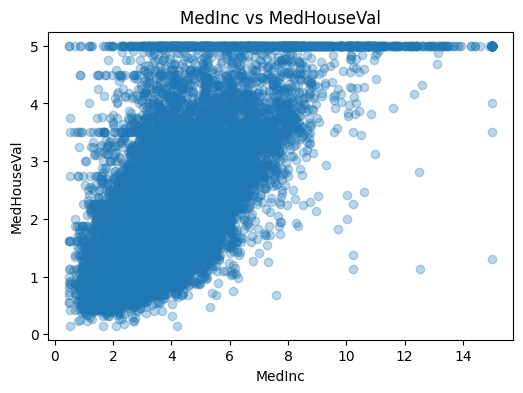

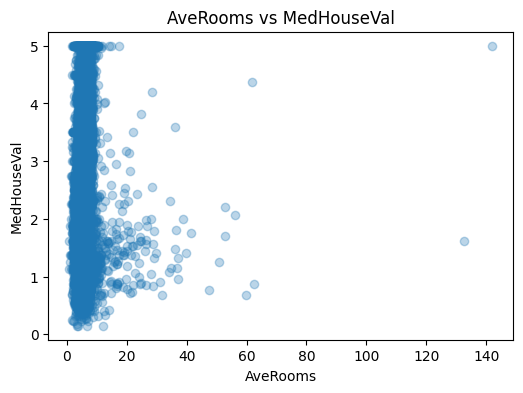

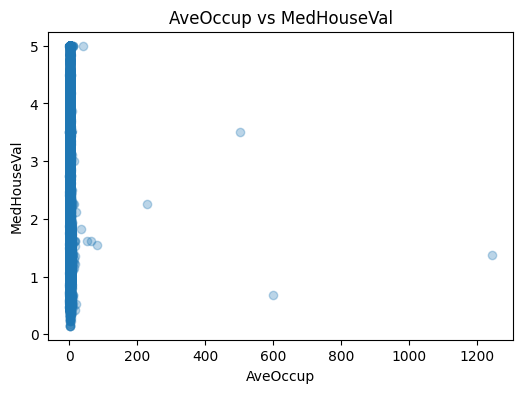

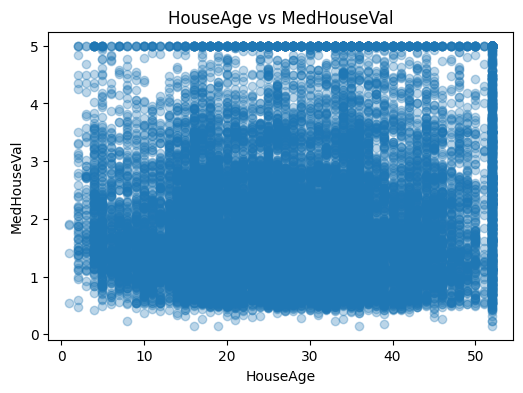

In [ ]:
# Visualize Relationships
# Create scatter plots to analyze feature-target relationships.

def plot_scatter(df, features, target):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df[target], alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.show()

# Plot selected features
features_to_plot = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
plot_scatter(df, features_to_plot, 'MedHouseVal')


In [ ]:
# 5 ML Model Training
# Train-Test Split
# Split the data into 80% training and 20% testing.

X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model Selection & Training
# Use Linear Regression for baseline modeling.

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# 6. Model Evaluation
# Evaluate performance using RMSE and R².

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.75
R² Score: 0.58


In [ ]:
# 7. Model Prediction
# Predict house value for new input data.

new_data = [[3, 30, 6, 1, 1500, 3, 34, -118]]  # Example input
predicted_price = model.predict(new_data)
print(f"Predicted Median House Value: ${predicted_price[0] * 100000:.2f}")


Predicted Median House Value: $154866.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
